# Graphics using ggplot2

One aspect for which the tidyverse shines is the generation of nice plots. This is done using the `ggplot2` package. 

A comment for GCDkit users: figaro was a great concept, 20 years ahead of its time. ggplot does most of what figaro was doing - and some more- and of course, has benefited from 20 years of continuous development, including full-time developers. It is therefore not a suprise that it is more mature, stable and documented !

The core concept is rather similar : ggplot returns an object, that can be further manipulated. Several commands allow to tweak if (compare with `figXXX()` functions). it is also possible to pile several graphical "layers" on the same plot (hint: this is how you define templates :-) ).

ggplot, being part of the tidyverse, expect tibbles and works well with pipes. It also defines a `+` operator that is an easy way to add more layers.

In [2]:
library(tidyverse)
library(readxl)

gcdkit.dir<-"C:\\Users\\moje4671\\R\\win-library\\3.6\\GCDkit\\"
sazxlFile <- paste(gcdkit.dir,"Test_data\\sazava.xls",sep="")

sazava_tbl<- read_xls(sazxlFile)

Warning message:
"package 'tidyverse' was built under R version 3.6.3"
-- Attaching packages --------------------------------------- tidyverse 1.3.0 --

v ggplot2 3.3.2     v purrr   0.3.4
v tibble  3.0.4     v dplyr   1.0.2
v tidyr   1.0.2     v stringr 1.4.0
v readr   1.4.0     v forcats 0.5.0

Warning message:
"package 'ggplot2' was built under R version 3.6.3"
Warning message:
"package 'tibble' was built under R version 3.6.3"
Warning message:
"package 'tidyr' was built under R version 3.6.3"
Warning message:
"package 'readr' was built under R version 3.6.3"
Warning message:
"package 'purrr' was built under R version 3.6.3"
Warning message:
"package 'dplyr' was built under R version 3.6.3"
Warning message:
"package 'forcats' was built under R version 3.6.3"
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()

Warning message:
"package 'readxl' was built under R version 3.6.3"
N

The basic components of a ggplot are
- **data** (of course !). ggplot being part of the tidyverse, data is invariably the first argument to all the functions, so it is automatically piped through.
- "**Aesthetics mapping**". A somewhat weird name, that refers to what is represented (for instance, x is SiO2, y is MgO, colour is intrusion). 
- **Geometry**. Points, lines, density contours, etc. Even maps.
- **Scales**. Some are obvious (a linear scale for x, a log scale for y...), but the concept is expanded to include, for instance, a colour scale, a size scale, etc.
- **Coordinate system**. Partly overlaps with the following... this is the best place to rescale your graph.
- **Theme**. Defines things like axes, fonts, backgrounds... 

Additionally, you can use
- **Statistical functions**
- **Facets**. Identical to GCDkit's "multiple plots by group", split the main plot in one sub-plot for each group.

## A basic plot

A simple binary plot requires `data=sazava_tbl`, aesthetics mapping `aes(x=SiO2,y=MgO)` and a geometry `geom_point()`. Like that:

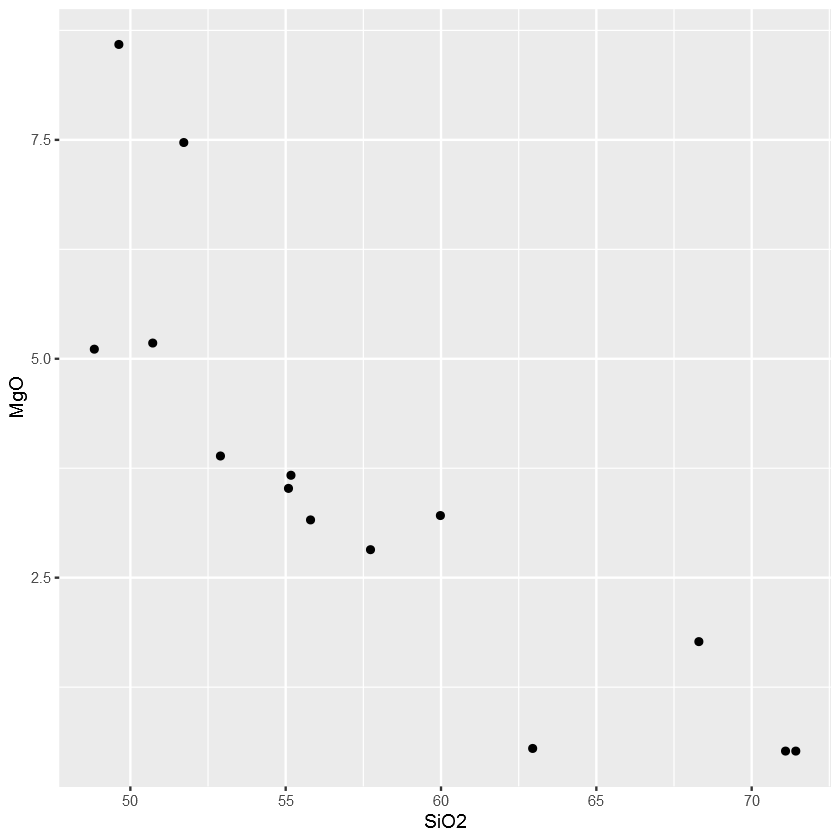

In [4]:
ggplot(data=sazava_tbl,aes(x=SiO2,y=MgO))+geom_point()

ggplot is pipe friendly, so the following also works:

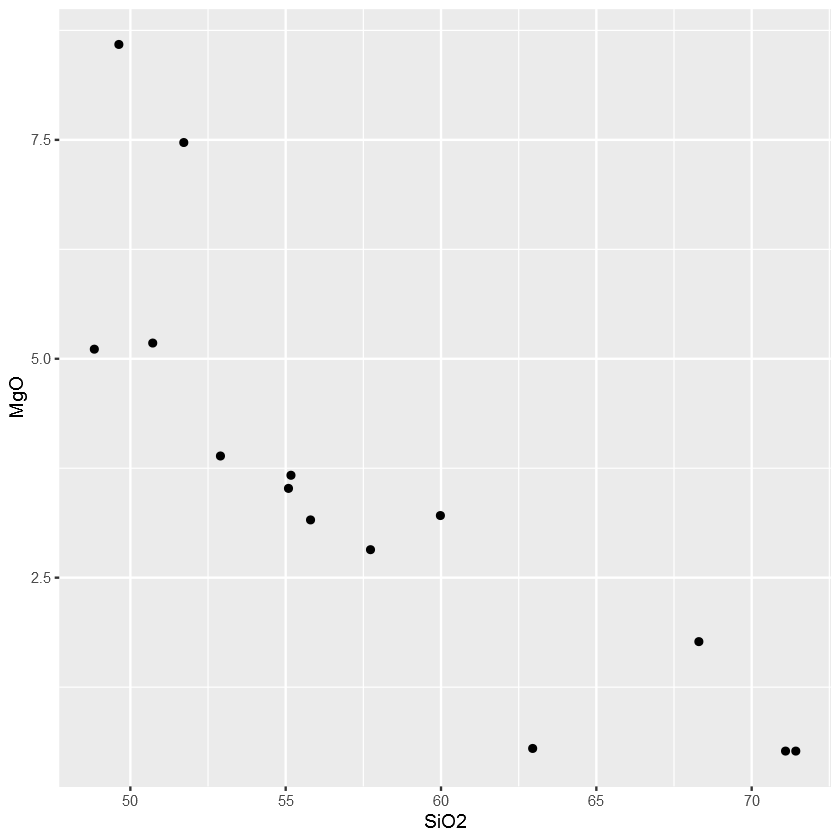

In [5]:
sazava_tbl %>% 
  ggplot(aes(x=SiO2,y=MgO))+
  geom_point()

There is quite a lot of flexibility. All the geom_ functions accept "data" and "aes", so you can actually combine various plots:

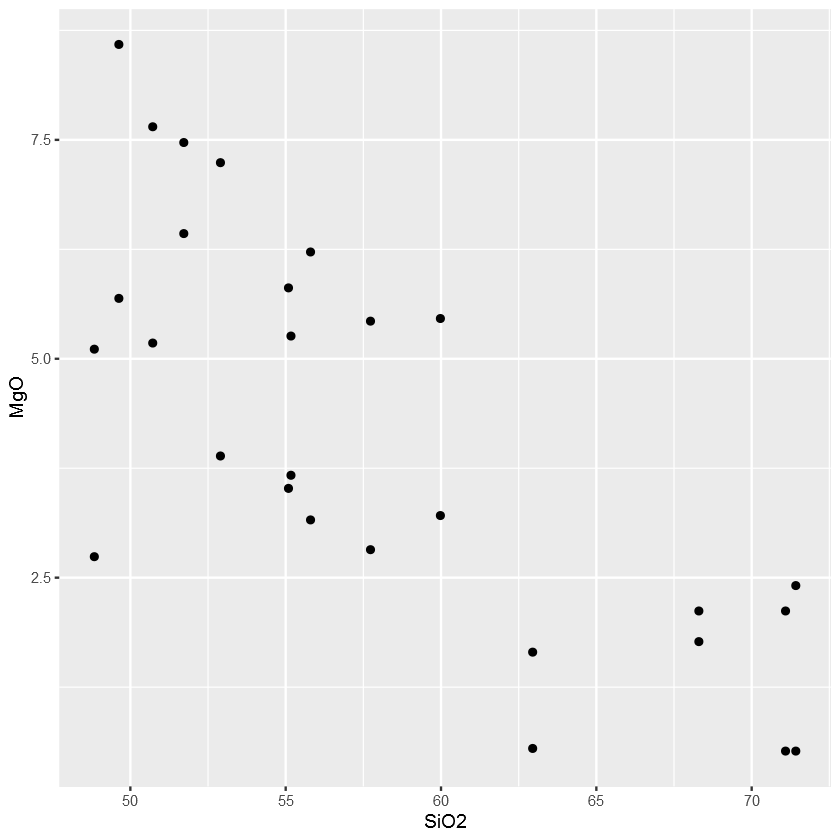

In [7]:
sazava_tbl %>% 
  ggplot()+
  geom_point(aes(x=SiO2,y=MgO)) +
  geom_point(aes(x=SiO2,y=FeO)) 
  

Or, using several datasets:

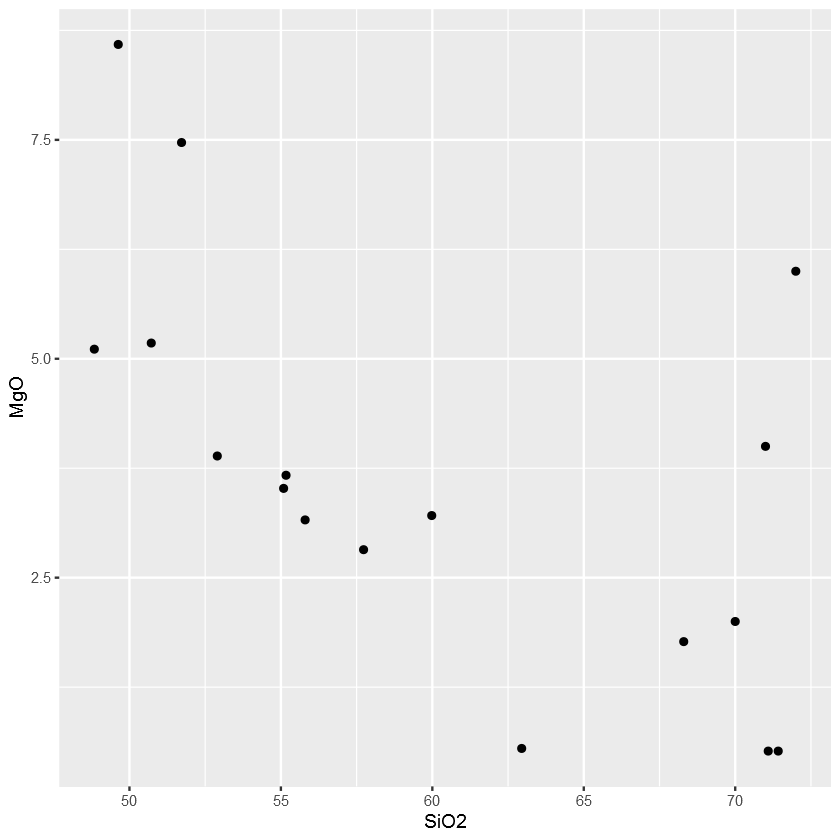

In [8]:
extra_data <- tibble(SiO2=c(70,71,72),MgO=c(2,4,6))
sazava_tbl %>% 
  ggplot()+
  geom_point(aes(x=SiO2,y=MgO)) +
  geom_point(data=extra_data, aes(x=SiO2,y=MgO))

Note that the first `geom_point()` uses an implicit definition for data (its first argument, piped from sazava_tbl). the second `geom_point()` uses an explicit definition (`data=extra_data`).

ggplot() returns a plot object (a function, in fact), that is modified by the `+` operator. So you can also affect it somewhere and return to it:

In [9]:
p<- sazava_tbl %>% 
  ggplot()+
  geom_point(aes(x=SiO2,y=MgO))

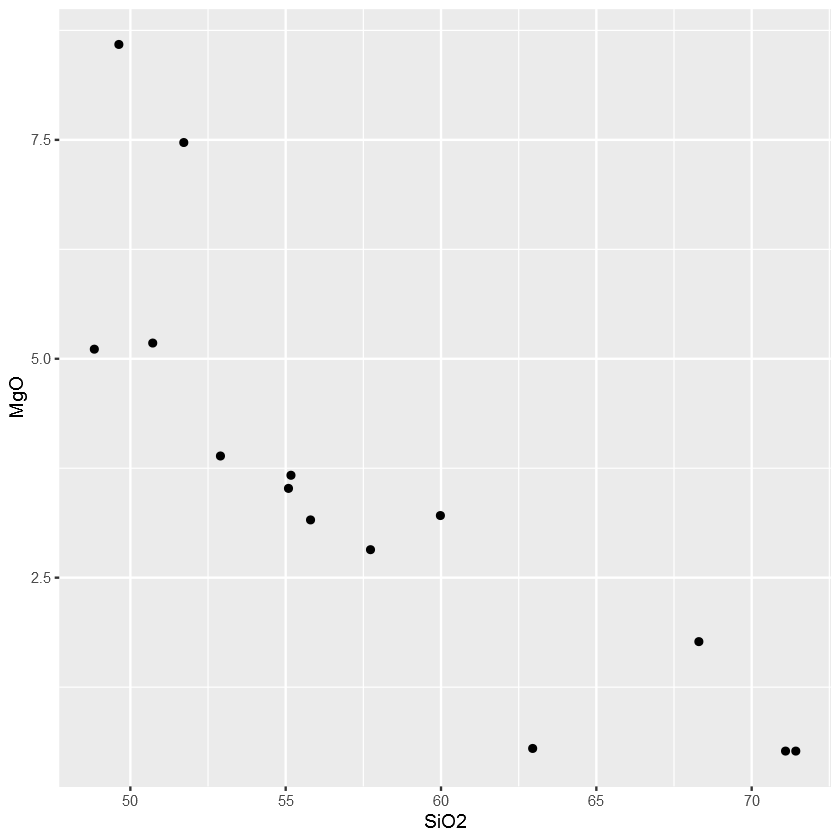

In [10]:
p # p is a function, so we execute it !

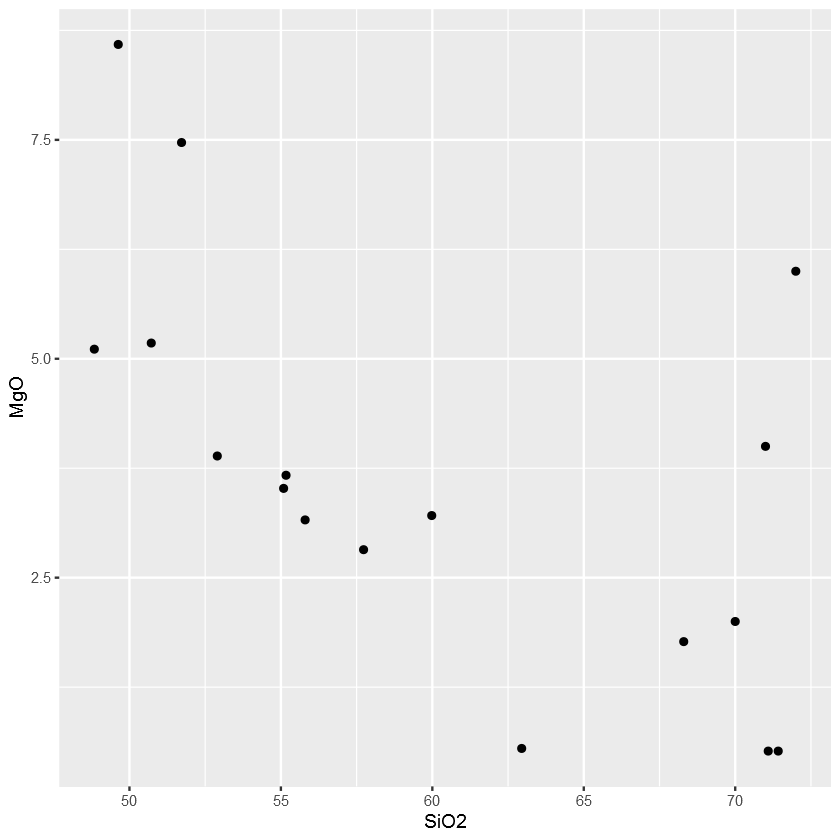

In [11]:
p+geom_point(data=extra_data, aes(x=SiO2,y=MgO))

This makes plates of several plots quite easy to use. There are several ways, more or less simple. Perhaps the nicest is `ggarrange` from package `egg`:

In [34]:
library(egg)
p2<-p+geom_point(data=extra_data, aes(x=SiO2,y=MgO))
ggarrange(p,p2)

Loading required package: gridExtra


Attaching package: 'gridExtra'


The following object is masked from 'package:dplyr':

    combine




ERROR: Error in eval(expr, envir, enclos): objet 'p' introuvable


## Colors, symbols and other graphical parameters

ggplot deals quite nicely with symbology, but in a rather high level way -  i.e. it expects to decide itself on the colours to use, not to find them defined in the data file (as in GCDkit). To emulate the gcdkit behaviour, however, there are workarounds...

The basic use is to "map" (in aesthetics mapping) the colour to a variable :

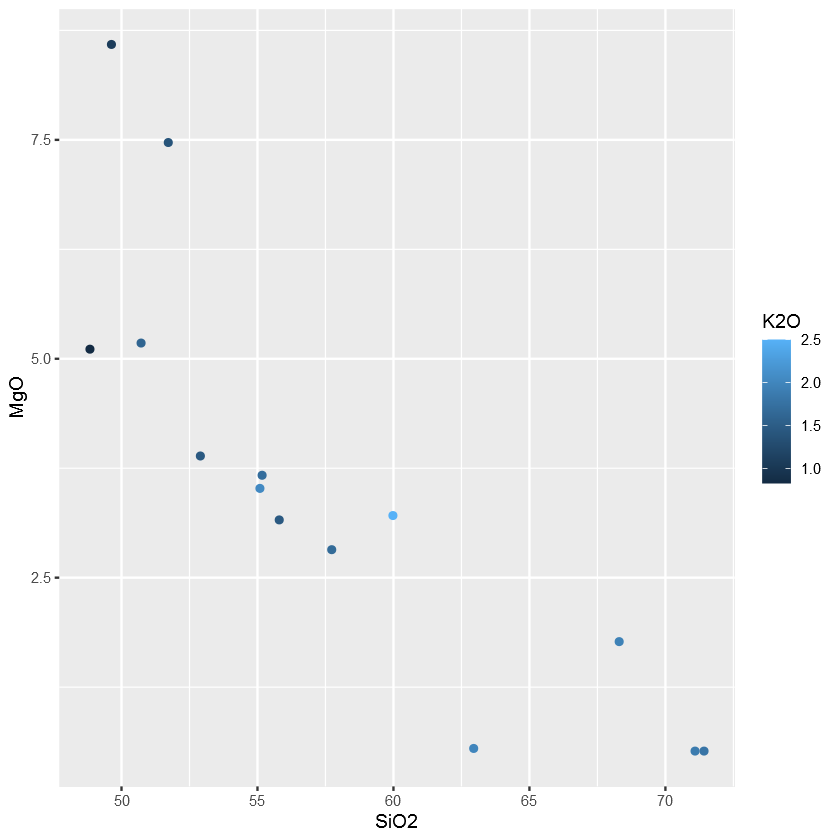

In [14]:
sazava_tbl %>% 
  ggplot()+
  geom_point(aes(x=SiO2,y=MgO,color=K2O))

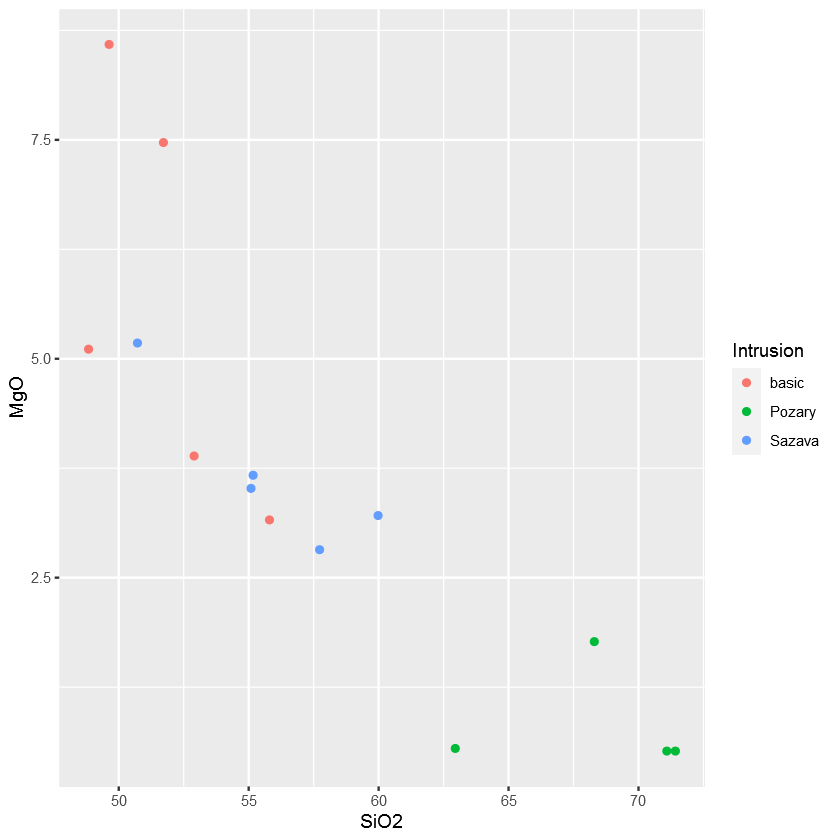

In [16]:
sazava_tbl %>% 
  ggplot()+
  geom_point(aes(x=SiO2,y=MgO,color=Intrusion))

The choice of colours can be controlled using `scale_color_` functions:

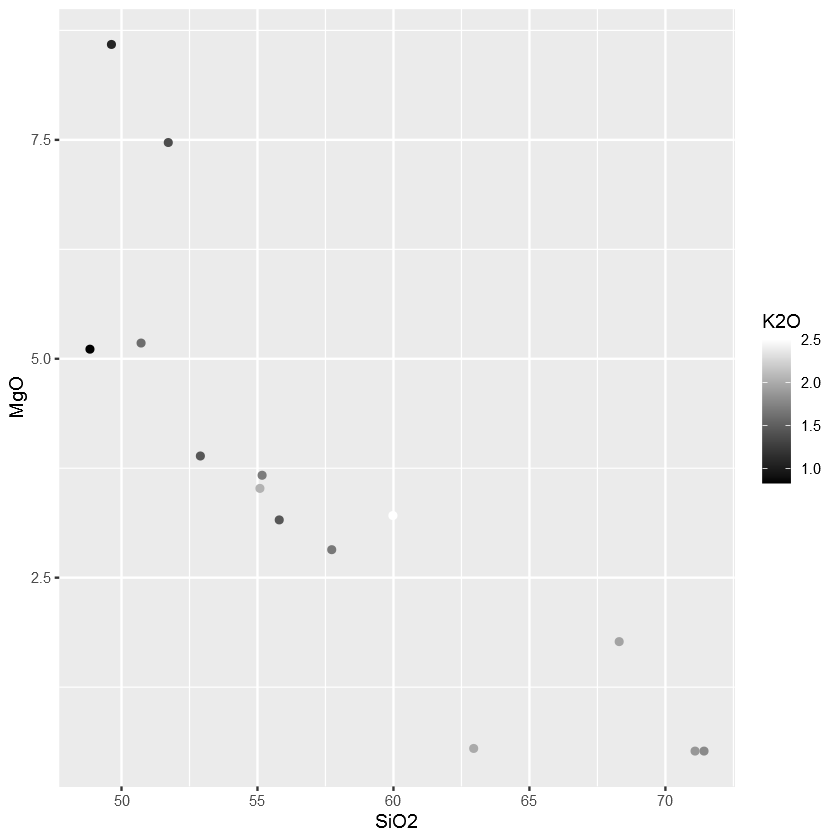

In [17]:
sazava_tbl %>% 
  ggplot()+
  geom_point(aes(x=SiO2,y=MgO,color=K2O))+
  scale_color_gradient(low="black",high="white")

Over-riding the ggplot definitions, however, is a bit more tricky:

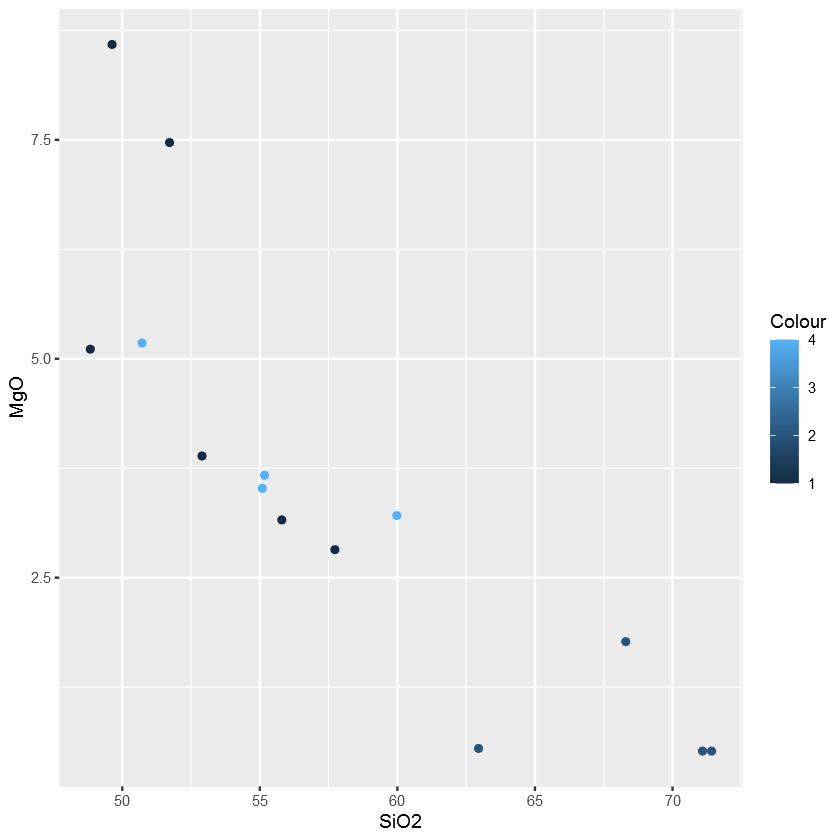

In [18]:
sazava_tbl %>% 
  ggplot()+
  geom_point(aes(x=SiO2,y=MgO,color=Colour))

This is absolutely not the intended result, because ggplot looks into the content of the Colour variable (here, it's numeric) and tries to guess a colour scale that represents this range of numbers (from 1 to 4). Likewise :

In [ ]:
sazava_tbl %>% 
  ggplot()+
  geom_point(aes(x=SiO2,y=MgO,shape=Symbol))
# Will yield an error !

This does not even work, because shape expects a discrete variable and, in this case, the column Symbol contains numbers...

The key is again to override the default color and shape scale, like that:

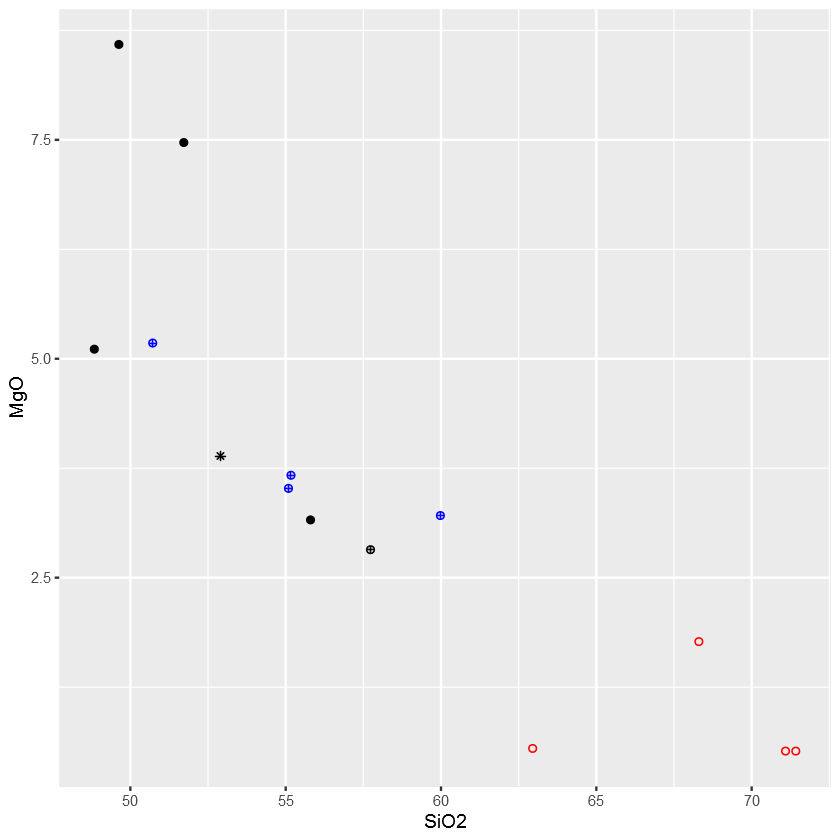

In [20]:
sazava_tbl %>% 
  ggplot()+
  geom_point(aes(x=SiO2,y=MgO,color=Colour,shape=Symbol))+
  scale_color_identity()+ 
  scale_shape_identity()

... which starts to look familiar !

The trick, here, was to use scale_identity, that instructs ggplot to use the values as it finds them in the column.

## Facets
a.k.a. "multiple plots by group" are built-in in ggplot :

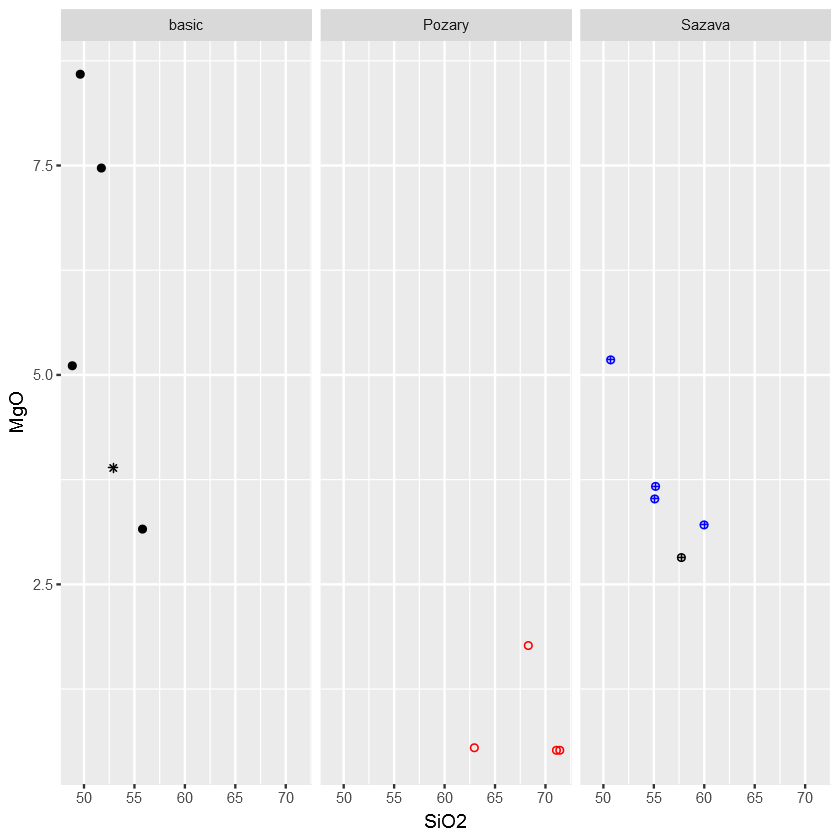

In [22]:
sazava_tbl %>% 
  ggplot()+
  geom_point(aes(x=SiO2,y=MgO,color=Colour,shape=Symbol))+
  scale_color_identity()+ 
  scale_shape_identity() +
  facet_wrap("Intrusion")

(no, I don't know why here you need to quote "Intrusion" here but not column names in aes mappings.... you can also write   `facet_wrap(~Intrusion)` )

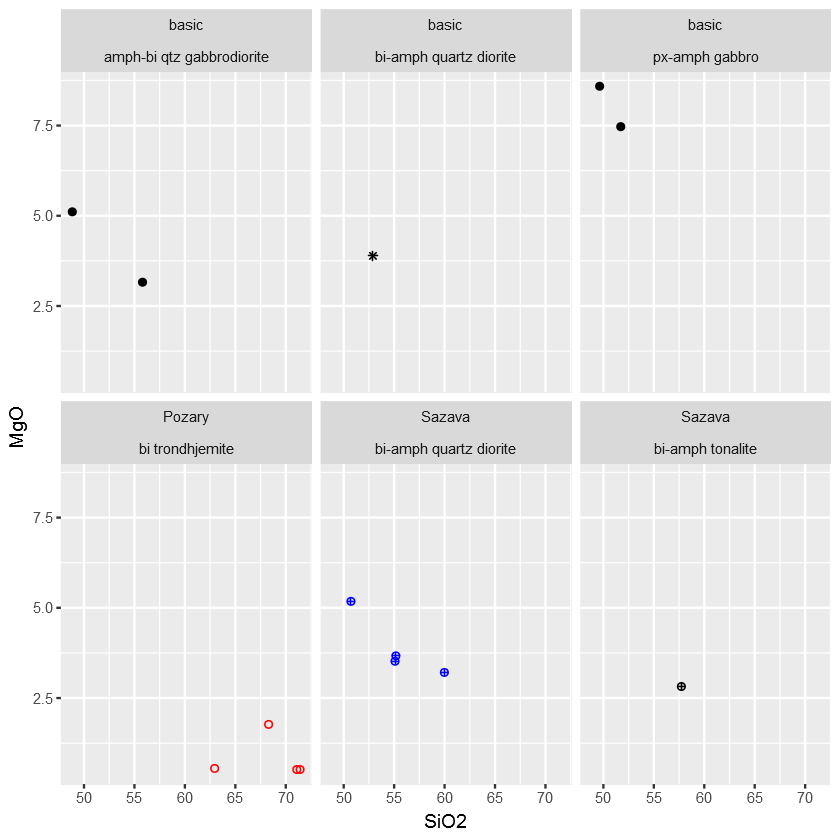

In [24]:
sazava_tbl %>% 
  ggplot()+
  geom_point(aes(x=SiO2,y=MgO,color=Colour,shape=Symbol))+
  scale_color_identity()+ 
  scale_shape_identity() +
  facet_wrap(c("Intrusion","Petrology"))

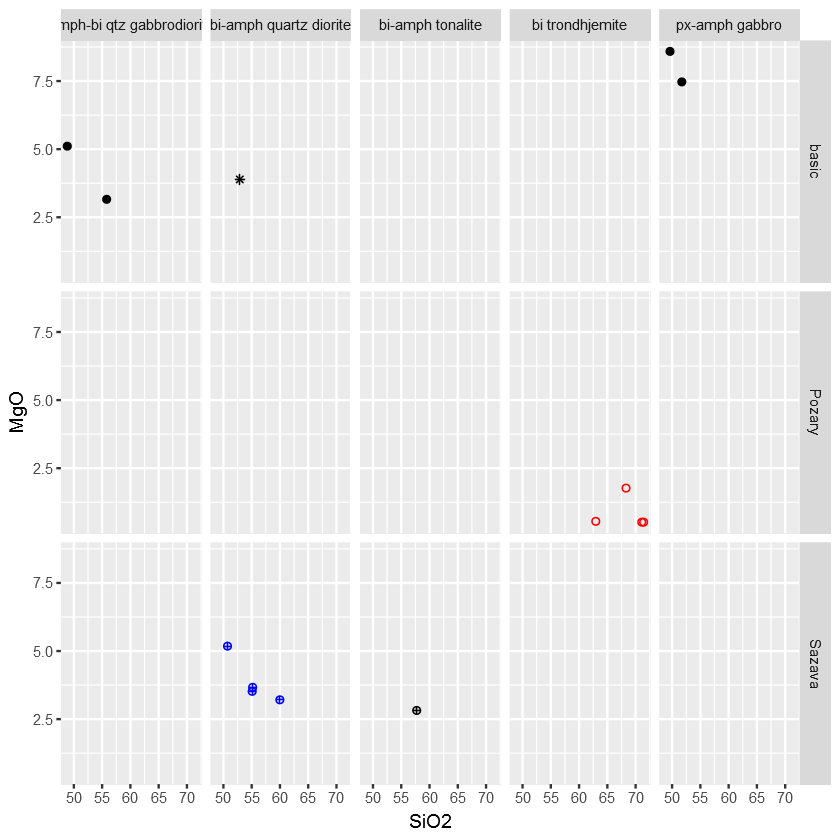

In [5]:
sazava_tbl %>% 
  ggplot()+
  geom_point(aes(x=SiO2,y=MgO,color=Colour,shape=Symbol))+
  scale_color_identity()+ 
  scale_shape_identity() +
  facet_grid(rows=vars(Intrusion),cols=vars(Petrology))

(Why the weird syntax with `vars()` in `facet_grid()` ? I don't know, either....)

To do multiple plots by a continuous variable, you still need to make the groups yourself, but pipes and mutate make is quite easy :

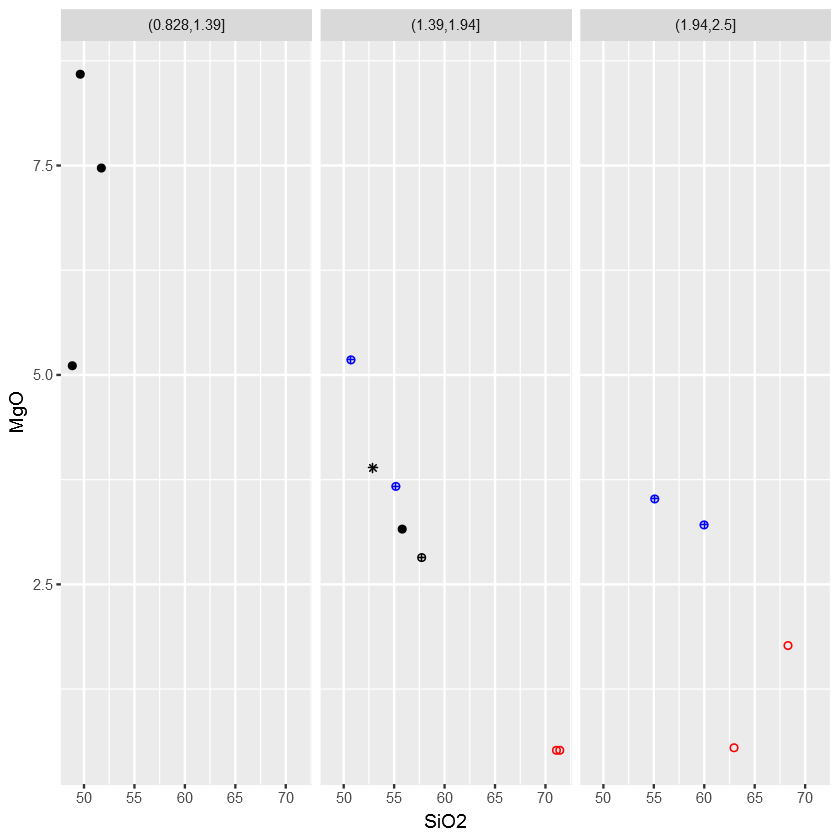

In [32]:
sazava_tbl %>% 
mutate(K_level = cut(K2O,3)) %>%
  ggplot()+
  geom_point(aes(x=SiO2,y=MgO,color=Colour,shape=Symbol))+
  scale_color_identity()+ 
  scale_shape_identity() +
  facet_wrap("K_level")


## Themes

Themes offer a comfortable way to set various visual parameters for a graph. `theme_bw()` or `theme_article()` (from package egg) is a good stating point :

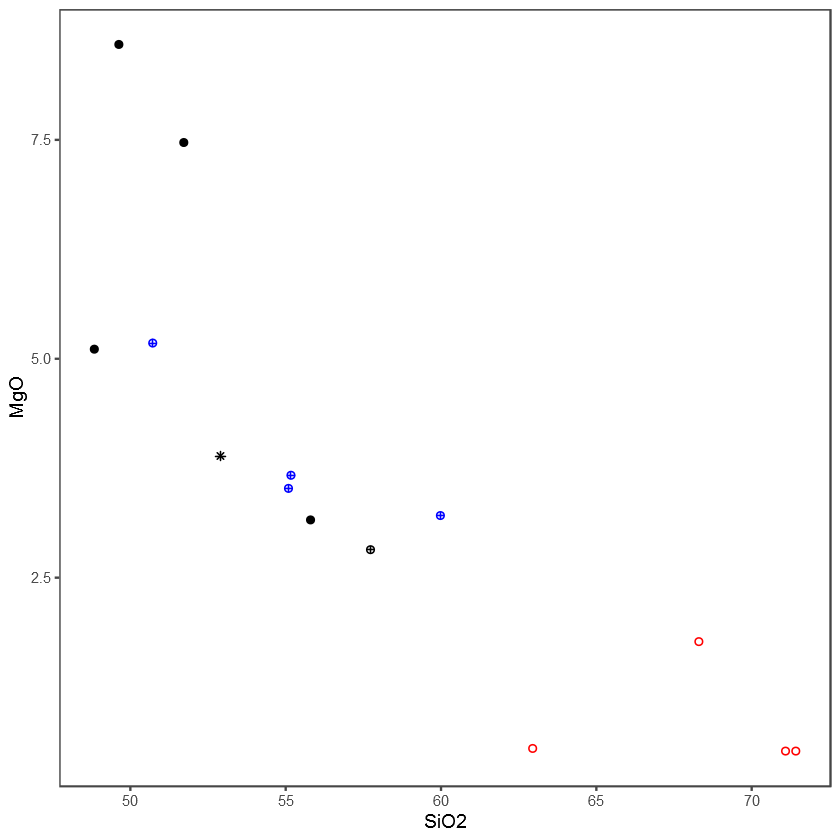

In [33]:
sazava_tbl %>% 
  ggplot()+
  geom_point(aes(x=SiO2,y=MgO,color=Colour,shape=Symbol))+
  scale_color_identity()+ 
  scale_shape_identity() +
  theme_article()

You can then customize about every element of a theme:

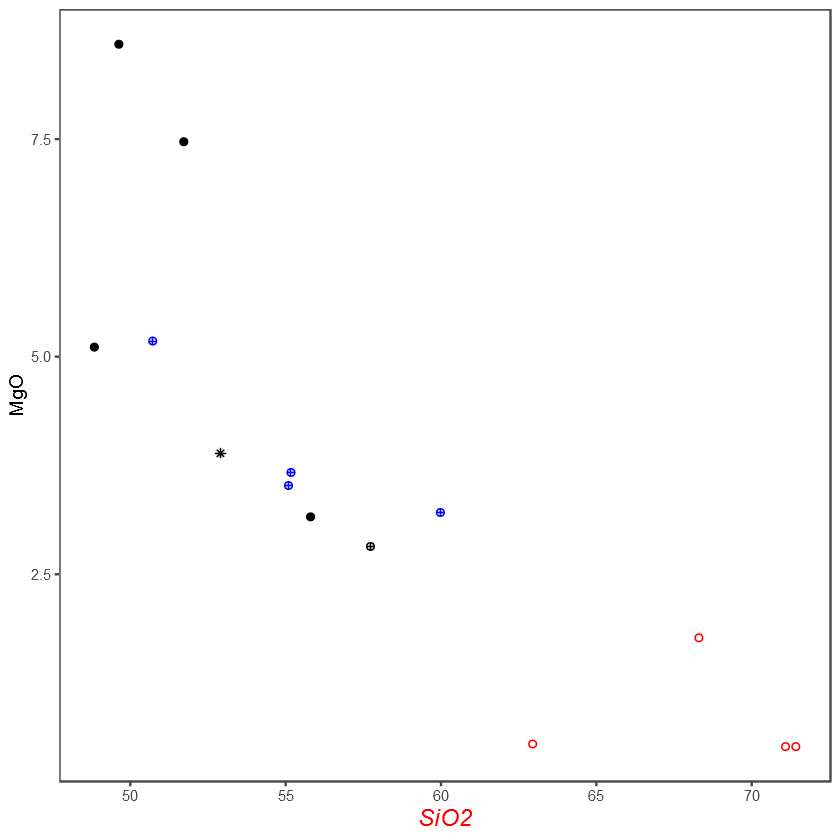

In [50]:
sazava_tbl %>% 
  ggplot()+
  geom_point(aes(x=SiO2,y=MgO,color=Colour,shape=Symbol))+
  scale_color_identity()+ 
  scale_shape_identity() +
  theme_article()+ 
  theme(axis.title.x = element_text(size=14, face="italic", colour = "red"))

And so, you can easily build a custom theme with your favourite settings, for instance

In [43]:
theme_ugly <- function () { 
  theme_bw(base_size=12, base_family="Avenir") %+replace% 
    theme(
      panel.background  = element_blank(),
      plot.background = element_rect(fill="turquoise"), 
      legend.background = element_rect(fill="transparent", colour=NA),
      legend.key = element_rect(fill="transparent", colour=NA),
      panel.grid = element_blank(),
      axis.title.x = element_text(size=14, face="bold", colour = "green"),
      axis.title.y = element_text(size=14, face="bold", colour = "red",angle=-90),
      axis.text.x = element_text(size=12, colour = "black"),
      axis.text.y = element_text(size=12, colour = "black",angle=90),
      axis.ticks.length = unit(1.5, "cm")
    )
}


Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"famille de police introuvable dans la base de données des polices Windows"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"famille de police introuvable dans la base de données des polices Windows"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"famille de police introuvable dans la base de données des polices Windows"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"famille de police introuvable dans la base de données des polices Windows"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"famille de police introuvable dans la base de données des polices Windows"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"famille de police introuvable dans la base de données des polices Windows"
Warning message in grid.Call.graphics(C_text, as.gra

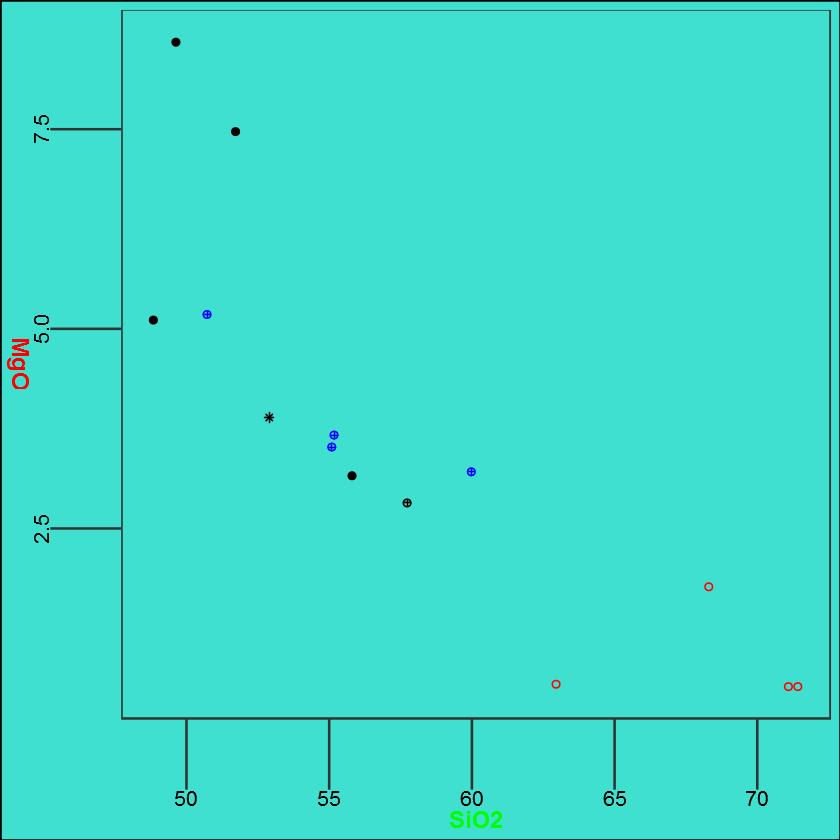

In [44]:
sazava_tbl %>% 
  ggplot()+
  geom_point(aes(x=SiO2,y=MgO,color=Colour,shape=Symbol))+
  scale_color_identity()+ 
  scale_shape_identity() +
  theme_ugly()

## Advanced graphs

Of course, in petrology we need specialist graphs, and these require a bit more work. 

### Ternary plots

Ternary plots are, of course, binary plots with special lines and coordinates (this is how they are built in GCDkit, of course). It is not very difficult to emulate this behaviour with GCDkit, although of course you loose most interactive functionalities.

A promising package is ggtern: http://www.ggtern.com

It works rather well (but has some bad interactions with some themes):


In [67]:
library(ggtern)
sazava_tbl %>% ggtern(aes(SiO2,Al2O3,MgO))+geom_point()

ERROR: Error in ggtern(., aes(SiO2, Al2O3, MgO)): impossible de trouver la fonction "ggtern"


... alas, ggtern redefines ggplot's basic theme, so now the following does not work fully (the axis labels are killed)...

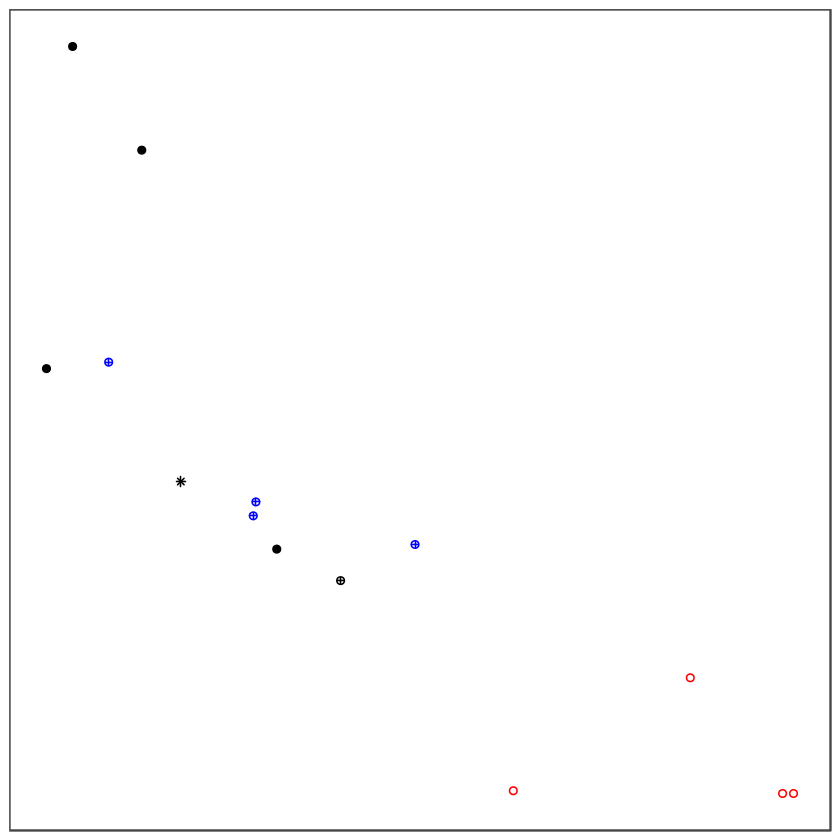

In [76]:
sazava_tbl %>% 
  ggplot()+
  geom_point(aes(x=SiO2,y=MgO,color=Colour,shape=Symbol))+
  scale_color_identity()+ 
  scale_shape_identity() +
  theme_article()

... so now that you have ruined your themes, restart from the top and reload a fresh copy of ggplot ! :-/

### Plots with templates
One of the nicest feature of GCDkit, of course, is the predefined plots. They are defined by functions (such as `AFM()` ), that (i) calculate the plot coordinates and put them in global x.data and y.data; (ii) define a template made of lines and text and put it in `sheet$demo$template`

Capturing the template is, therefore, not very difficult. All one needs to do is to run the plotting function and read its output. The various annotation layers can be converted to ggplot as follows:

- A line is a `geom_path`
- A text is an annotation (be careful, since GCDkit also has an `annotate` function you need to call exlicitely `ggplot2::annotate` )
- An abline is a `geom_vline` or `geom_hline`

Thus, the following function should work (GCDkit does not play well in jupyter, so try it in Rgui)

In [32]:

ggplotDiagram<-function(diagram){
  
  diagram()
  
  plot_type <- sheet$demo$template$GCDkit$plot.type
  
  xlims <- sheet$demo$call$xlim
  ylims <- sheet$demo$call$ylim
  
  xlab <- sheet$demo$call$xlab
  ylab <- sheet$demo$call$ylab
  
  plottingDS <- tibble(x=x.data,y=y.data,col=labels$Colour,sym=labels$Symbol,Size=labels$Size)
  
  template <- sheet$demo$template
  
  pointsize = par("ps") # the default R pointsize: this is the number of pts corresponding to a size 1 text/symbol (cex=1)
  
  # in ggplot the sizes are given in mm, with the conversion factor in .pt
  # So the adjustment factor for text is
  text_size_magic_nbr <- pointsize/.pt
  
  # ggplot has default symbol size of 5 mm (see GeomPoint$default_aes ? ) compared to <pointsize> pts in basic R
  # So to emulate the graphs we must account for that
  point_size_magic_nbr <- pointsize/5
  
  # The defaut size of the text is theme_get()$text$size
  
  make_templ_element<-function(tpl_el){
    #browser()
    
    names(tpl_el)[1]<-"type"
    # cat("plotting ",tpl_el$type,"\n")
    gg_el <- NULL
    # Lines
    if(tpl_el$type=="lines"&&!is.null(tpl_el$col)){ # A line without colour does not exist...
      the_line <- tibble(x=tpl_el$x,y=tpl_el$y)
      gg_el <- geom_path(data=the_line,aes(x,y,colour=tpl_el$col,linetype=tpl_el$lty))
    }
    
    # Ablines
    if(tpl_el$type=="abline"){ 
      # print(tpl_el)
      if(!is.null(tpl_el$v)){
        gg_el <- geom_vline(aes(xintercept = tpl_el$v,colour=tpl_el$col,linetype=tpl_el$lty))
      }
      if(!is.null(tpl_el$h)){
        gg_el <- geom_hline(aes(yintercept = tpl_el$h,colour=tpl_el$col,linetype=tpl_el$lty))
      }
      
    }
    
    # Text
    if(tpl_el$type=="text"){ 
      
      # There is no reliable default for these, so if they are not supplied we must define them...
      if(is.null(tpl_el$srt)){angle<-0}else{angle<-tpl_el$srt} 
      if(is.null(tpl_el$cex)){cex<-1}else{cex<-tpl_el$srt} 
      if(is.null(tpl_el$col)){col<-"black"}else{col<-tpl_el$col} 
      
      # adj is a bit more complex, as ggplot does not take a vector but wants 2 scalars
      vadj <- NA
      if(is.null(tpl_el$adj)){
        hadj <- 0.5
      }else{
        hadj<-tpl_el$adj[1]
        if(length(tpl_el$adj==2)){
          vadj <- tpl_el$adj[2]
        }
      } 
      
      # Build the text label (annotation layer)
      gg_el <- ggplot2::annotate("text",label=tpl_el$text,x=tpl_el$x,y=tpl_el$y,
                                 colour=col,
                                 size=cex*text_size_magic_nbr,
                                 angle=angle,
                                 hjust = hadj)
    }
    
    return(gg_el)
    
  }
  
  plt<- ggplot(plottingDS) + 
    geom_point(aes(x, y,colour=col,shape=sym,size=Size*point_size_magic_nbr))+
    map(template,make_templ_element)+
    scale_shape_identity()+
    scale_color_identity()+
    scale_linetype_identity()+
    scale_size_identity()+
    scale_x_continuous(expand=c(0,0))+
    scale_y_continuous(expand=c(0,0))+
    coord_cartesian(xlim=xlims,ylim=ylims)+
    labs(x=xlab,y=ylab)+
    theme_article()
  
  # Suppress the "real" axes for a ternary
  if(plot_type == "ternary"){
    plt<-plt+theme(axis.line = element_blank(),
                   panel.border = element_blank(),
                   axis.ticks = element_blank(),
                   axis.title = element_blank(),
                   axis.text.x = element_blank(),
                   axis.text.y = element_blank())
  }
  
  print(plt)
  invisible(plt)
}

Try at your own risk...

### Spider plots

Try the following tidbit:

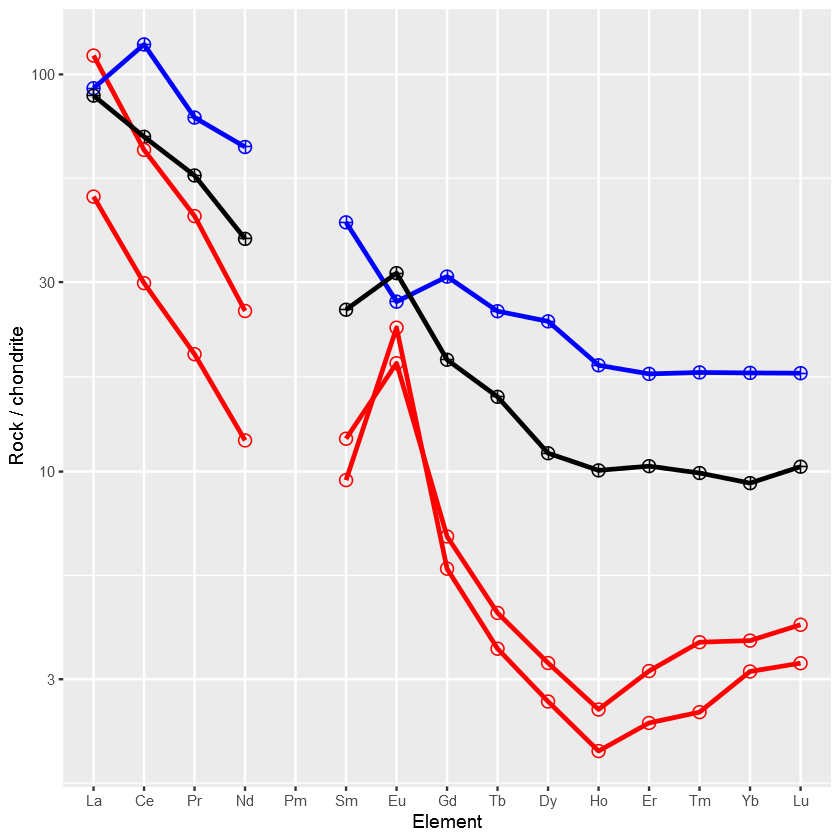

In [15]:
GCDkit::selectNorm("Anders & Grevesse 1989") %>%
  as_tibble() %>%
  mutate(Rock="Chondrite") %>%
  {.} -> chdr

REE <- setdiff(names(chdr),"Rock")

sazava_tbl %>% 
  rename(Rock=`...1`) %>%
  bind_rows(chdr) %>%
  mutate(across(all_of(REE), ~./.[Rock == "Chondrite"] ) ) %>%
  filter(Rock != "Chondrite") %>%
  gather(REE,key="Element",value=Concentration) %>%
  ggplot(aes(x=Element,y=Concentration,group=Rock,color=Colour,shape=Symbol))+
  geom_point(size=3)+
  xlim(REE)+
  labs(y="Rock / chondrite")+
  scale_y_log10()+
  scale_color_identity()+
  scale_shape_identity()+
  geom_path(size=1)

